<a href="https://colab.research.google.com/github/hhnnhh/berlin_datascience_lab/blob/master/exploration/01_EDA/EDA_correlations_hnh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check correlation between variable and emission or target for:
- engine size 
- model
later on:
- cyl, trans type, dual exhaust

Summary of my suggestions following the EDA:
I'd suggest to use ENGINE_SIZE; CYL and eventually TRANS_TYPE.

1. use **ENGINE_SIZE** but *not* **ENGINE_SIZE_ORIG**
2. use **MAKE** but *not* **MODEL** ('MODEL' needs to be cleaned, but 'MAKE' will eventually contain similar information. Consider using MODEL if MAKE is very good)
4. I'd suggest to use **CYL** after getting rid of the letter 'R'. Can and should be converted to float? 
5. **TRANS_TYPE** (automatic/manual) - I read an article that automatic cars can have lower emissions (but only certain automatic cars) --> take or leave?
6. **DUAL_EXHAUST** (yes/no), binary variables.  DE is very imbalanced with only 0.6% YES. Not so interesting I guess.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Loading data frame

In [ ]:
#data path:
data_path = "/content/drive/My Drive/WIMLDS/sample.csv"
#data load
df = pd.read_csv(data_path, lineterminator='\n')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,18,26,108,109) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Preparing the data for exploration



    engine size
    model
    cyl, trans type, dual exhaust


In [ ]:
cols = df.columns.tolist()
cols

In [ ]:
keep_cols = ['E_HIGH_DCF','VIR_CERT_NUMBER', 'STATION_NUM', 'ANALYZER_NUM', 'INSPECTOR_NUM', 'TEST_SDATE', 'TEST_EDATE', 'VIN', 'VIN_SOURCE', 'VEH_LICENSE', 'GVW_TYPE', 'GVWR', 'MODEL_YEAR', 
             'MAKE', 'MODEL', 'CYL', 'ENGINE_SIZE', 'TRANS_TYPE', 'DUAL_EXHAUST', 'ODOMETER', 'FUEL_TYPE', 'VEHICLE_TYPE', 'ZIP_CODE', 'CERTIFICATION', 'ESC', 'VRT_RECORD_ID', 
             'ABORT_CODE', 'SOFTWARE_VERSION', 'OVERALL_RESULT','ENGINE_SIZE_ORIG', 'VID_TEST_TYPE','E_HIGH_CO_RESULT','E_HIGH_HC_RESULT','E_IDLE_HC_RESULT', 'E_IDLE_CO_RESULT', 'E_HIGH_DCF', 'E_HIGH_RPM', 
             'E_HIGH_CO2', 'E_HIGH_O2', 'E_HIGH_HC', 'E_HIGH_HC_DCF', 'E_HIGH_HC_LIMIT', 'E_HIGH_CO', 'E_HIGH_CO_DCF', 'E_HIGH_CO_LIMIT', 'E_IDLE_DCF', 'E_IDLE_RPM', 'E_IDLE_CO2', 'E_IDLE_O2', 
             'E_IDLE_HC', 'E_IDLE_HC_DCF', 'E_IDLE_HC_LIMIT', 'E_IDLE_CO', 'E_IDLE_CO_DCF', 'E_IDLE_CO_LIMIT', 'E_HIGH_DCF_2', 'E_HIGH_RPM_2', 'E_HIGH_CO2_2', 'E_HIGH_O2_2', 'E_HIGH_HC_2', 
             'E_HIGH_HC_DCF_2', 'E_HIGH_CO_2', 'E_HIGH_CO_DCF_2', 'E_IDLE_DCF_2', 
             'E_IDLE_RPM_2', 'E_IDLE_CO2_2', 'E_IDLE_O2_2', 'E_IDLE_HC_2', 'E_IDLE_HC_DCF_2', 'E_IDLE_CO_2', 'E_IDLE_CO_DCF_2']
df
df = df[keep_cols]

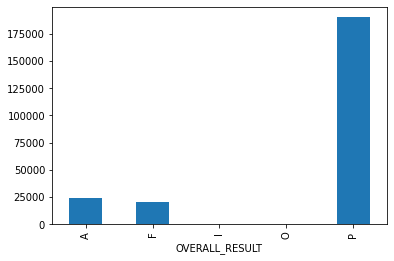

In [ ]:
df.groupby('OVERALL_RESULT').size().plot.bar()

In [ ]:
#reducing df by overall-result = P,F
df = df[df.OVERALL_RESULT.isin(['P', 'F'])]

### CO - Carbonmonoxide

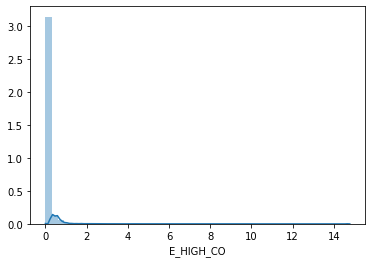

In [ ]:
sns.distplot(df["E_HIGH_CO"])

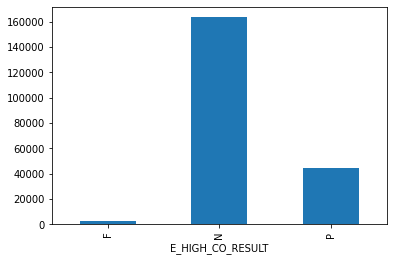

In [ ]:
df.groupby('E_HIGH_CO_RESULT').size().plot.bar()

In [ ]:
df.E_HIGH_CO.value_counts()

0.00     167723
0.01       8156
0.02       2787
0.03       1725
0.04       1215
          ...  
11.59         1
10.13         1
12.47         1
9.81          1
8.57          1
Name: E_HIGH_CO, Length: 981, dtype: int64

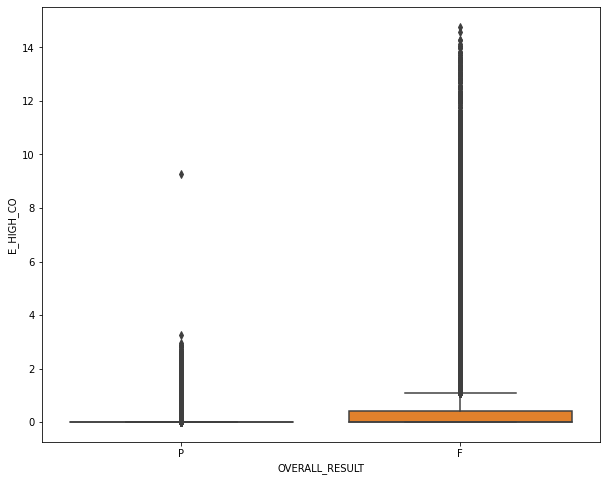

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='OVERALL_RESULT', y='E_HIGH_CO')

In [ ]:
df['AGE'] = pd.to_datetime(df["TEST_EDATE"]).dt.year - df["MODEL_YEAR"]

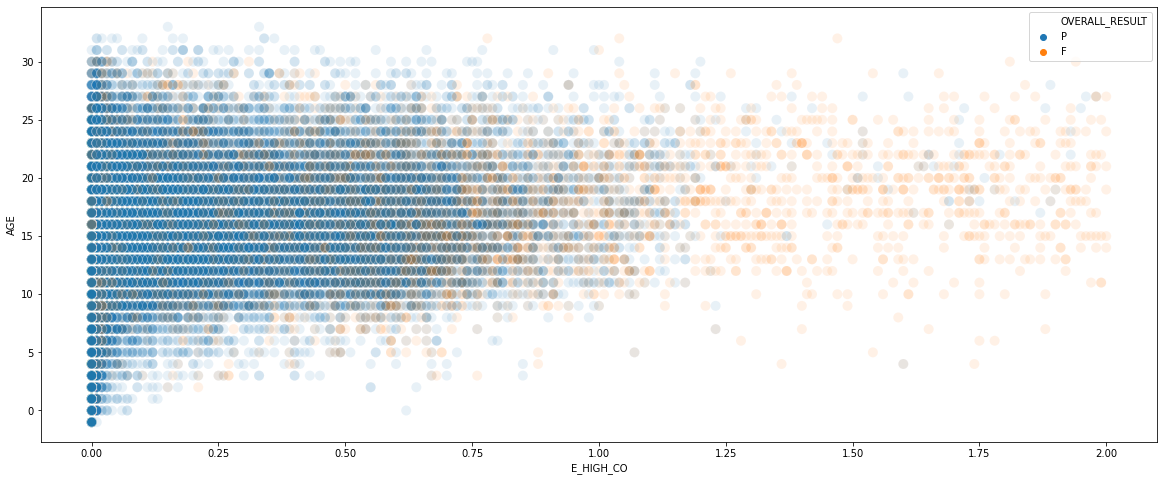

In [ ]:
fig, ax = plt.subplots(figsize=[20,8])
#sns.countplot(df['E_HIGH_CO'])
#df[df.E_HIGH_CO < 2].groupby('OVERALL_RESULT').size().plot.bar()
sns.scatterplot(data=df[(df.E_HIGH_CO >= 0) & (df.E_HIGH_CO <= 2)], x='AGE', y='E_HIGH_CO', hue='OVERALL_RESULT', s=100, alpha=.1)

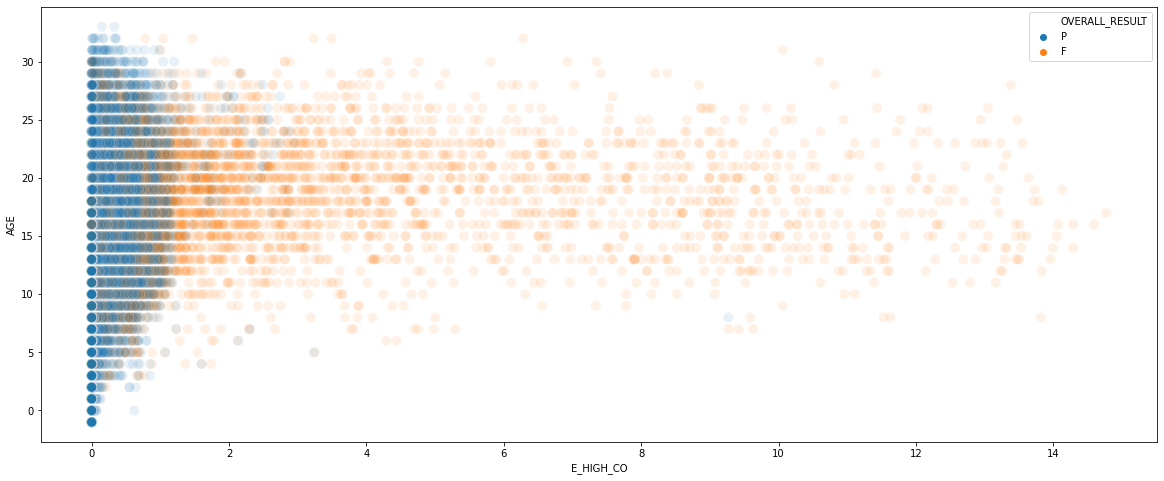

In [ ]:
fig, ax = plt.subplots(figsize=[20,8])
#sns.countplot(df['E_HIGH_CO'])
#df[df.E_HIGH_CO < 2].groupby('OVERALL_RESULT').size().plot.bar()
sns.scatterplot(data=df, x='AGE', y='E_HIGH_CO', hue='OVERALL_RESULT', s=100, alpha=.1)

###what was E_HIGH_CO2 again?
1. (how) are CO and CO2 related
--> negative linear
2. what is the distribution of CO2
most of the values are *0* (160.000) and they indicate **PASSING** the test!!
also values around 15 indicate PASSING the test
values above zero and below 15 indicate FAILING -- u-shaped distribution?

3. which values are correlated with passing and failing? 

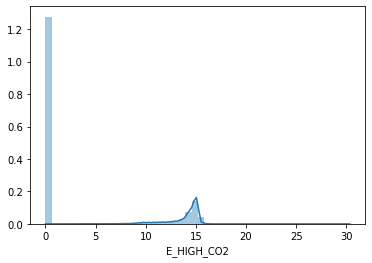

In [ ]:
sns.distplot(df["E_HIGH_CO2"])

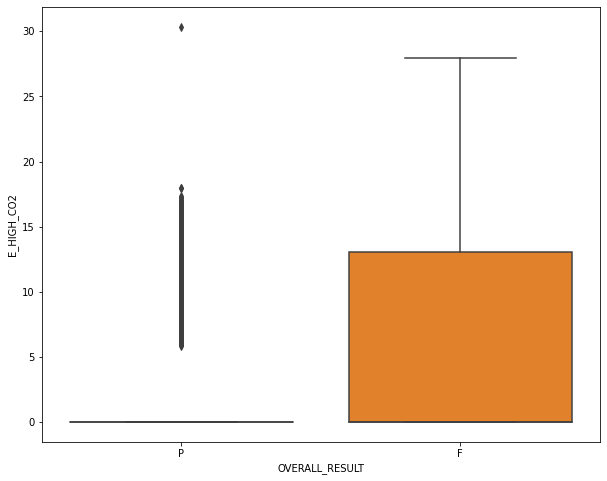

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='OVERALL_RESULT', y='E_HIGH_CO2')

In [ ]:
df.E_HIGH_CO2.describe()

count    210675.00000
mean          3.12199
std           5.85252
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max          30.34000
Name: E_HIGH_CO2, dtype: float64

In [ ]:
df.E_HIGH_CO2.value_counts()

0.000000     163257
15.000000      2828
15.100000      2675
14.900000      2577
14.800000      2140
              ...  
5.540000          1
17.900000         1
7.960000          1
16.459999         1
5.260000          1
Name: E_HIGH_CO2, Length: 589, dtype: int64

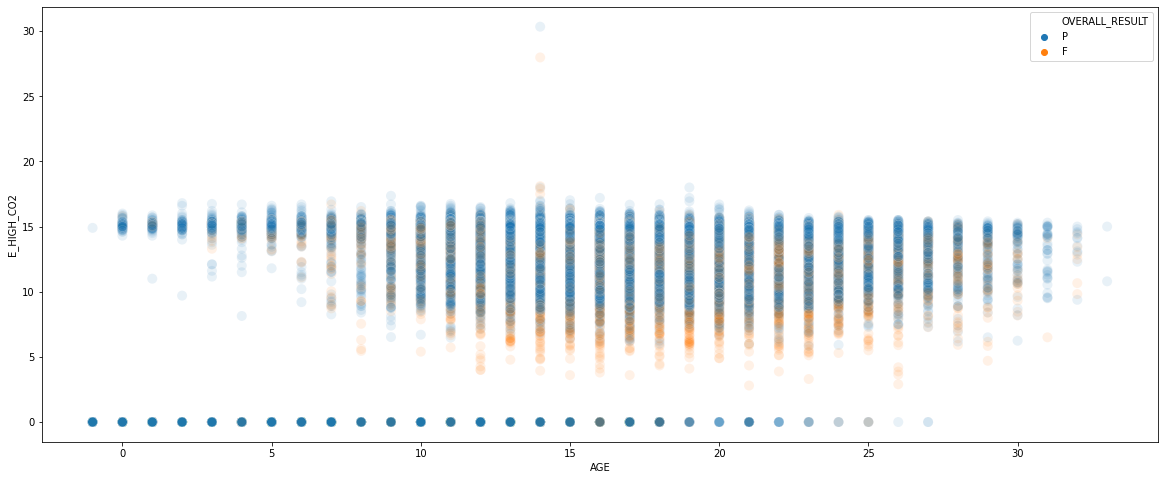

In [ ]:
fig, ax = plt.subplots(figsize=[20,8])
#sns.countplot(df['E_HIGH_CO'])
#df[df.E_HIGH_CO < 2].groupby('OVERALL_RESULT').size().plot.bar()
#sns.scatterplot(data=df[(df.E_HIGH_CO2 > 0)], x='AGE', y='E_HIGH_CO2', hue='OVERALL_RESULT', s=100, alpha=.1)
sns.scatterplot(data=df, x='AGE', y='E_HIGH_CO2', hue='OVERALL_RESULT', s=100, alpha=.1)

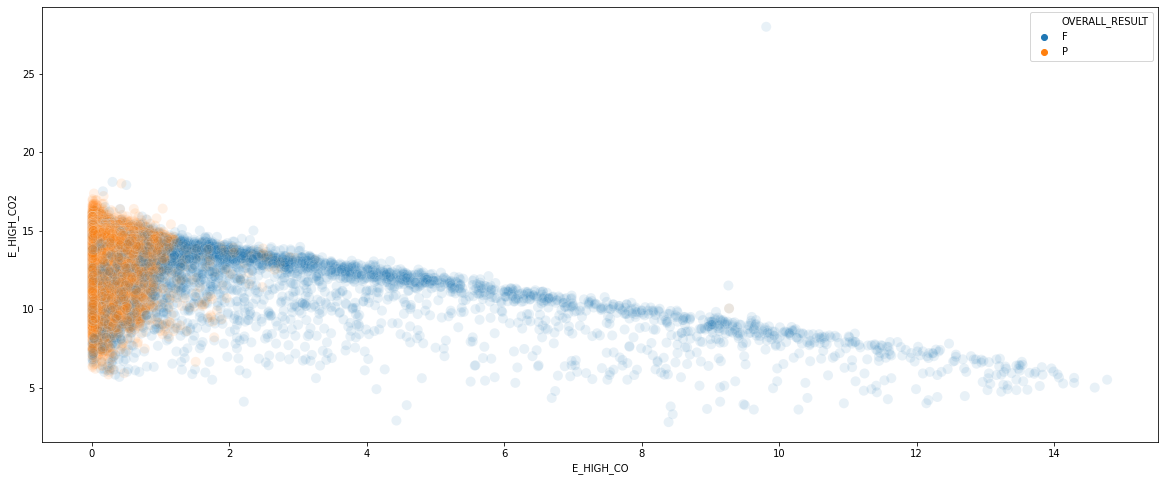

In [ ]:
fig, ax = plt.subplots(figsize=[20,8])
#sns.countplot(df['E_HIGH_CO'])
#df[df.E_HIGH_CO < 2].groupby('OVERALL_RESULT').size().plot.bar()
sns.scatterplot(data=df[(df.E_HIGH_CO2 > 0)& (df.E_HIGH_CO > 0)], x='E_HIGH_CO', y='E_HIGH_CO2', hue='OVERALL_RESULT', s=100, alpha=.1)

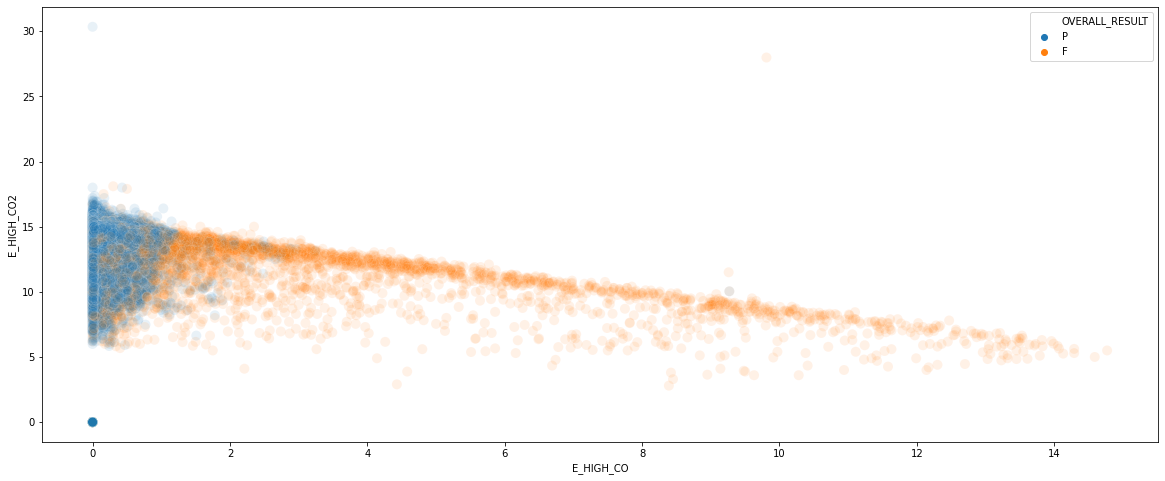

In [ ]:
fig, ax = plt.subplots(figsize=[20,8])
#sns.countplot(df['E_HIGH_CO'])
#df[df.E_HIGH_CO < 2].groupby('OVERALL_RESULT').size().plot.bar()
sns.scatterplot(data=df, x='E_HIGH_CO', y='E_HIGH_CO2', hue='OVERALL_RESULT', s=100, alpha=.1)

###Hydrocarbon

* smaller values = passing
* all values above 2000 seem to be outlier
* all values above 200 are fails


In [ ]:
df.E_HIGH_HC.describe()

count    210675.000000
mean         15.243550
std         129.293391
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       15738.000000
Name: E_HIGH_HC, dtype: float64

In [ ]:
df.E_IDLE_CO_RESULT.value_counts()

N    163871
P     44502
F      2302
Name: E_IDLE_CO_RESULT, dtype: int64

In [ ]:
df.E_HIGH_HC.value_counts()

0       163336
12        1566
13        1535
11        1521
14        1508
         ...  
696          1
2489         1
1258         1
2410         1
2047         1
Name: E_HIGH_HC, Length: 1060, dtype: int64

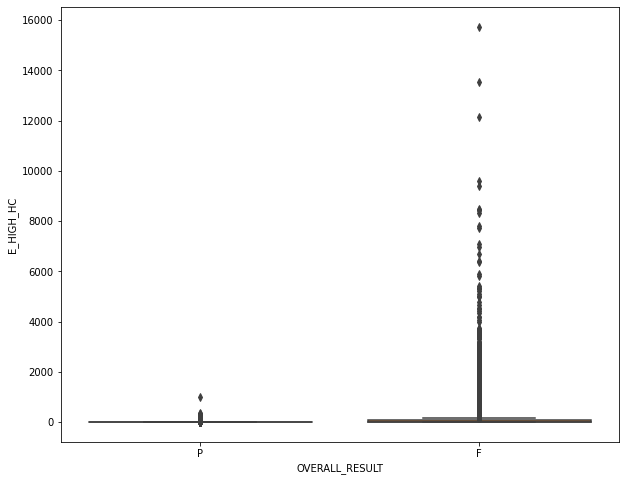

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='OVERALL_RESULT', y='E_HIGH_HC')

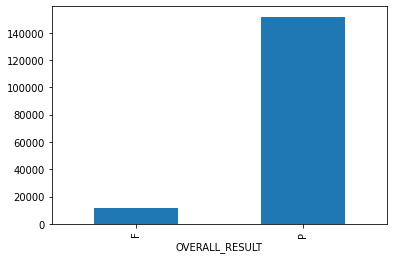

In [ ]:
df[df.E_HIGH_HC < 2].groupby('OVERALL_RESULT').size().plot.bar()


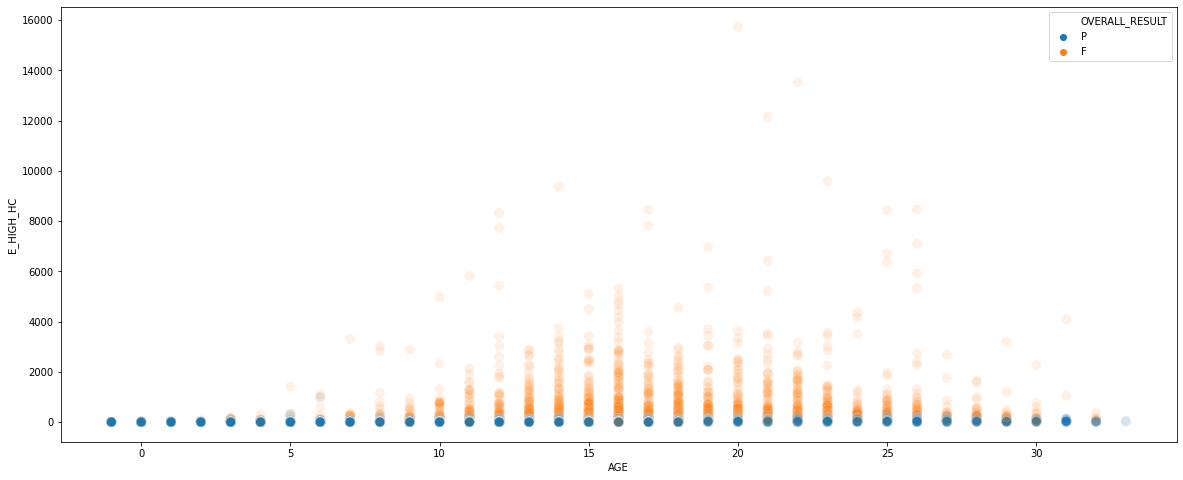

In [ ]:
fig, ax = plt.subplots(figsize=[20,8])
#sns.countplot(df['E_HIGH_CO'])
#df[df.E_HIGH_CO < 2].groupby('OVERALL_RESULT').size().plot.bar()
#sns.scatterplot(data=df[(df.E_HIGH_CO2 > 0)], x='AGE', y='E_HIGH_CO2', hue='OVERALL_RESULT', s=100, alpha=.1)
sns.scatterplot(data=df, x='AGE', y='E_HIGH_HC', hue='OVERALL_RESULT', s=100, alpha=.1)

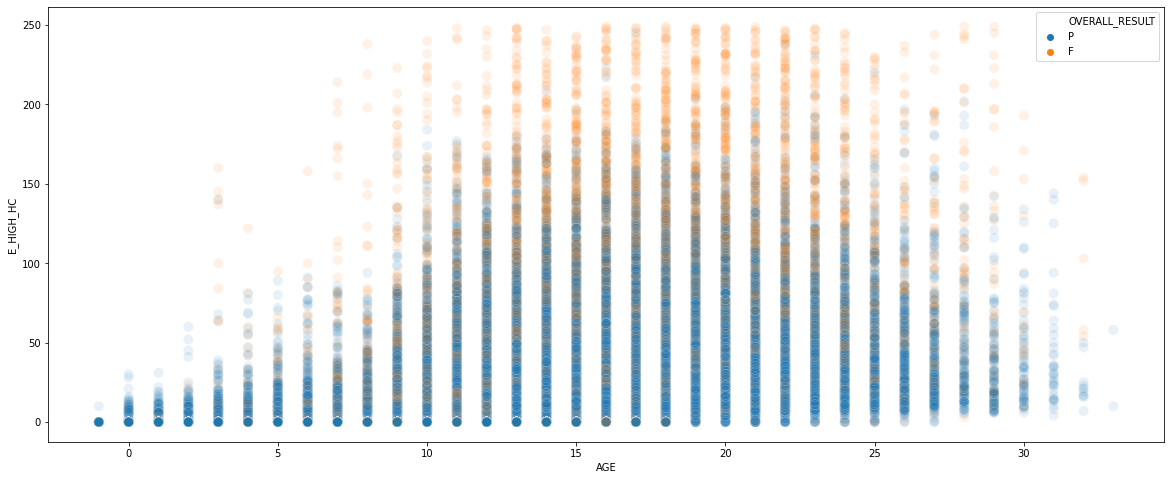

In [ ]:
fig, ax = plt.subplots(figsize=[20,8])
#sns.countplot(df['E_HIGH_CO'])
#df[df.E_HIGH_CO < 2].groupby('OVERALL_RESULT').size().plot.bar()
#sns.scatterplot(data=df[(df.E_HIGH_CO2 > 0)], x='AGE', y='E_HIGH_CO2', hue='OVERALL_RESULT', s=100, alpha=.1)
sns.scatterplot(data=df[df.E_HIGH_HC<250], x='AGE', y='E_HIGH_HC', hue='OVERALL_RESULT', s=100, alpha=.1)

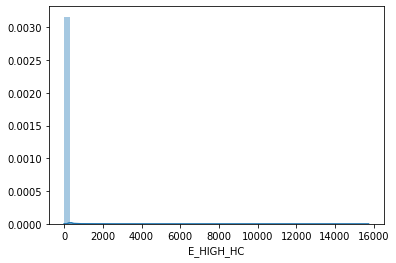

In [ ]:
sns.distplot(df["E_HIGH_HC"])

### oxygen
* all values above 50 seem to be outlier
* no direct relation with overall result

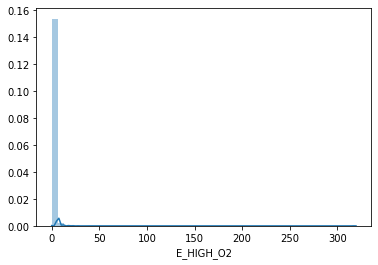

In [ ]:
sns.distplot(df["E_HIGH_O2"])

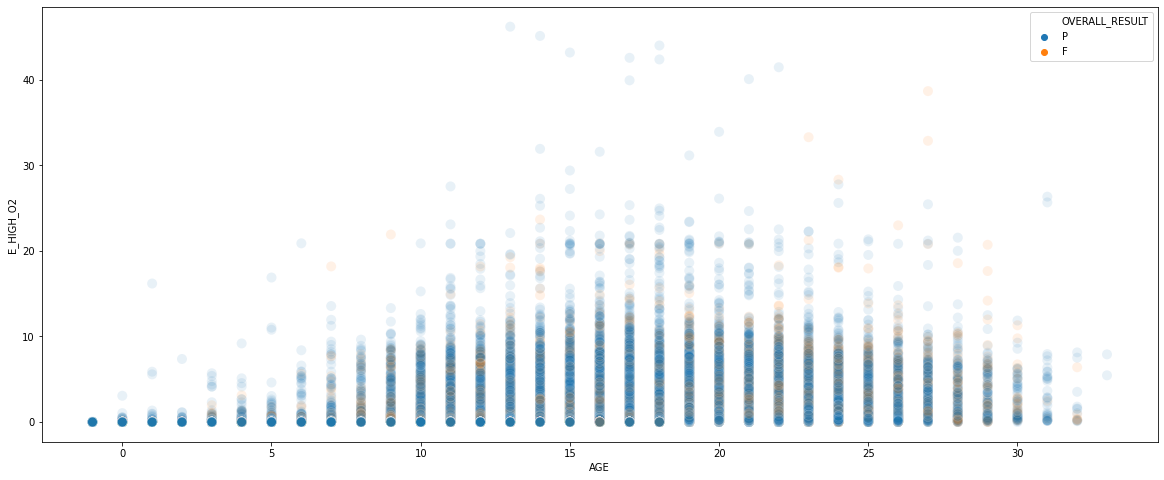

In [ ]:
fig, ax = plt.subplots(figsize=[20,8])
#sns.countplot(df['E_HIGH_CO'])
#df[df.E_HIGH_CO < 2].groupby('OVERALL_RESULT').size().plot.bar()
#sns.scatterplot(data=df[(df.E_HIGH_CO2 > 0)], x='AGE', y='E_HIGH_CO2', hue='OVERALL_RESULT', s=100, alpha=.1)
sns.scatterplot(data=df[df.E_HIGH_O2<50], x='AGE', y='E_HIGH_O2', hue='OVERALL_RESULT', s=100, alpha=.1)

#ENGINE SIZE 

ES correlated with the overall results?
--> the boxplot does not show an obvious difference
--> Failing cars seem to have a slightly smaller engine size but it might be confounded with age, as older cars will have smaller engines and will fail more often


## (A) ENGINE SIZE

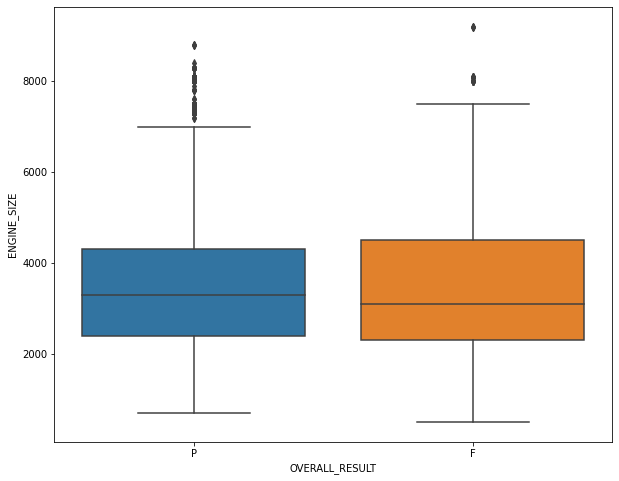

In [ ]:
#ENGINE SIZE DOES NOT SEEM TO HAVE AN IMPACT ON RESULT
# Failing cars seem to have a slightly smaller engine size but it might be confounded with age, as older cars will have smaller engines and fail more often
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='OVERALL_RESULT', y='ENGINE_SIZE')

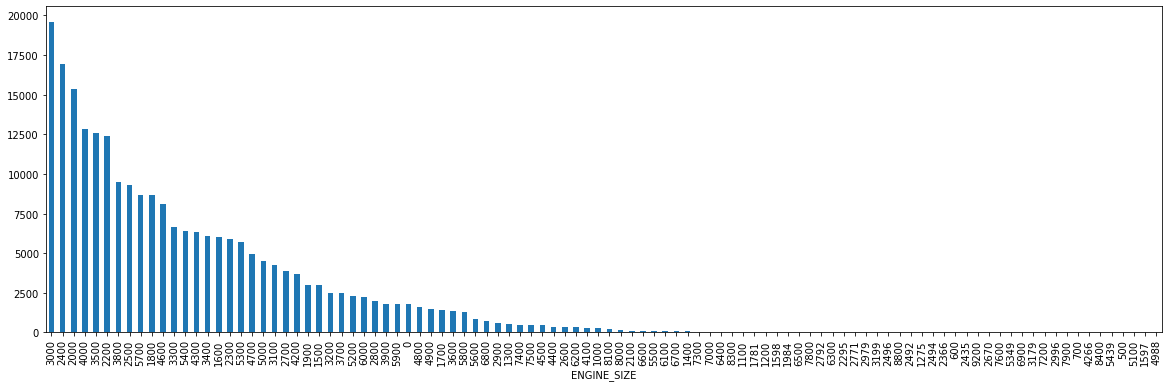

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby('ENGINE_SIZE').size().sort_values(ascending=False).head(100).plot.bar()

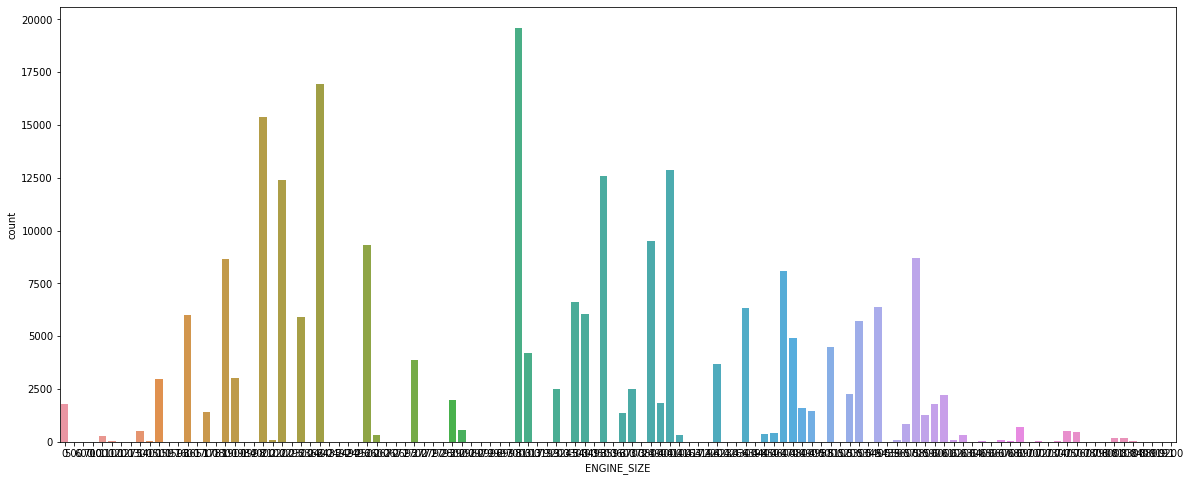

In [ ]:
fig, ax = plt.subplots(figsize=[20,8])
sns.countplot(df['ENGINE_SIZE'])
#sns.countplot((df['ENGINE_SIZE']>2000) & (df['ENGINE_SIZE']<4000))

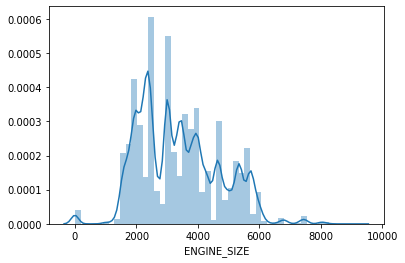

In [ ]:
sns.distplot(df["ENGINE_SIZE"])

##correlate engine size with


1.   ES with emission CO
2.   ES with emission HC
3.   ES with emission O?
* continuous / contin -- pearson

4. ES with Emission Results? CO, HC
* con / cat (3 categories) --> logreg

5. ES with Overall Result? 
* con / cat (binary) --> point biserial



In [ ]:
keep_cols = ['ENGINE_SIZE','E_HIGH_CO','E_HIGH_HC','E_HIGH_O2','E_HIGH_CO2','E_HIGH_CO_2','E_HIGH_HC_2','E_HIGH_O2_2','E_HIGH_CO2_2']
corr_df = df[keep_cols]


In [ ]:
corr_df.E_HIGH_HC.describe()

count    210675.000000
mean         15.243550
std         129.293391
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       15738.000000
Name: E_HIGH_HC, dtype: float64

In [ ]:
corr_matrix = corr_df.corr()

In [ ]:
corr_matrix["ENGINE_SIZE"].sort_values(ascending=False)

ENGINE_SIZE     1.000000
E_HIGH_O2       0.069991
E_HIGH_O2_2     0.006470
E_HIGH_CO2      0.001095
E_HIGH_CO      -0.001178
E_HIGH_HC      -0.004116
E_HIGH_HC_2    -0.012028
E_HIGH_CO_2    -0.018648
E_HIGH_CO2_2   -0.020674
Name: ENGINE_SIZE, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
attributes = ['ENGINE_SIZE','E_HIGH_CO','E_HIGH_HC','E_HIGH_O2','E_HIGH_CO2']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f687f3d30b8>,
      dtype=object)

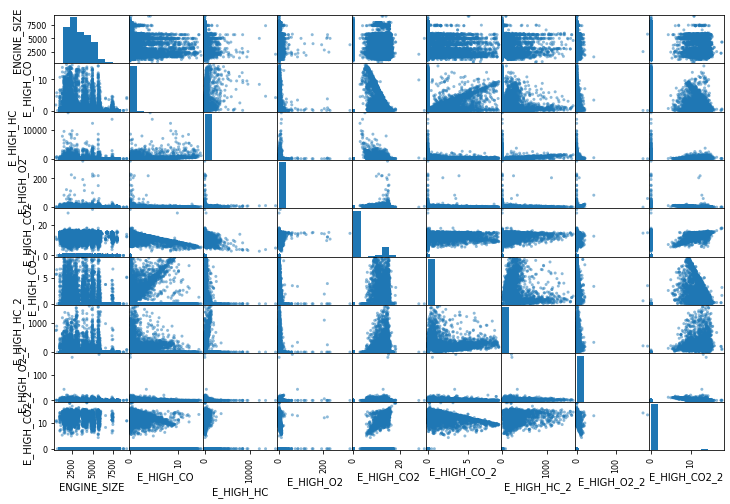

In [ ]:
scatter_matrix(corr_df[attributes],figsize=(12,8))

In [ ]:
clean_corr_df = corr_df[(corr_df['E_HIGH_HC']<250) & (corr_df['E_HIGH_O2']<50) & (corr_df['E_HIGH_CO']<=15)]

In [ ]:
clean_corr_matrix = clean_corr_df.corr()
clean_corr_matrix["ENGINE_SIZE"].sort_values(ascending=False)

ENGINE_SIZE     1.000000
E_HIGH_O2       0.100893
E_HIGH_CO       0.021929
E_HIGH_O2_2     0.003941
E_HIGH_CO2      0.001821
E_HIGH_CO_2    -0.014986
E_HIGH_HC      -0.018538
E_HIGH_CO2_2   -0.020691
E_HIGH_HC_2    -0.022765
Name: ENGINE_SIZE, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f686c9a5a90>,
      dtype=object)

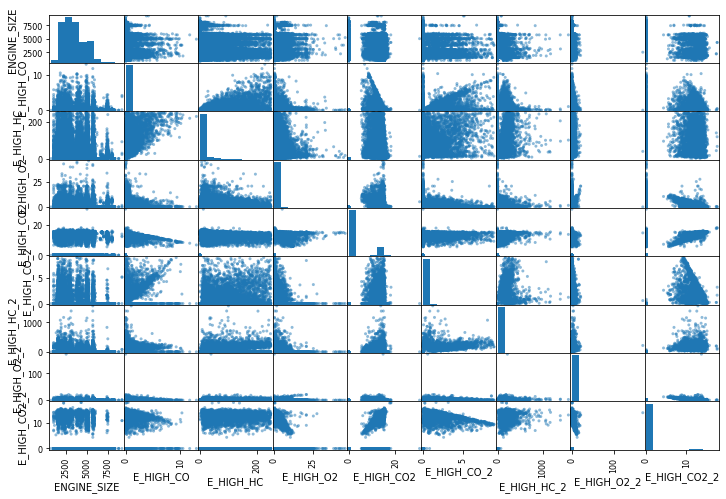

In [ ]:
scatter_matrix(clean_corr_df[attributes],figsize=(12,8))

# engine size vs. overall result (pass / fail)
--> point biserial correlation

In [ ]:
import pandas as pd
from scipy.stats import pointbiserialr

In [ ]:
df.OVERALL_RESULT

0         1
1         1
3         1
4         1
5         1
         ..
235171    1
235172    1
235173    1
235174    1
235175    1
Name: OVERALL_RESULT, Length: 210675, dtype: int64

In [ ]:
df['OVERALL_RESULT']=df['OVERALL_RESULT'].replace({'P':1, 'F':0})

In [ ]:
ES = df['ENGINE_SIZE']
OR = df['OVERALL_RESULT']

In [ ]:
# pbc of first question
pbc = pointbiserialr(ES,OR)
print(pbc)

PointbiserialrResult(correlation=-0.008716772346093065, pvalue=6.307701130409044e-05)


#MODEL exploration

My preliminary suggestion: use the variable MAKE before using MODEl. MAKE is cleaner, is less work and might contain similar information. **If MAKE is improving a lot, then we might think about cleaning MODEL and use it as well.**

We could think about:
1. using fuzzywuzzy to compare strings for similarity
2. use a clustering algorithm to group the models?
3. strip either all numbers or at least 4WD, 2WD and AWD to reduce number of cars
4. unique cars - do we need them? are they caused by mistakes?


In [ ]:
df.MODEL.describe()

count     210669
unique      2657
top        CAMRY
freq        4930
Name: MODEL, dtype: object

In [ ]:
df.MODEL.unique()

array(['RANGER REG. CAB - SHO', 'CAVALIER', 'GRAND WAGONEER', ...,
       'C30T5', 'FIT3', '500L'], dtype=object)

In [ ]:
df.MODEL.value_counts()

CAMRY           4930
CIVIC           4028
COROLLA         3321
TAURUS          3014
C1500           2887
                ... 
GRANDCARAVAV       1
FJCRUIZER          1
FORESTR            1
INTRIG             1
AVALNCHE           1
Name: MODEL, Length: 2657, dtype: int64

In [ ]:
len(df.MODEL.unique()) # es gibt nur 2740 unique models von 235177?

2658

In [ ]:
len(df.MODEL)

210675

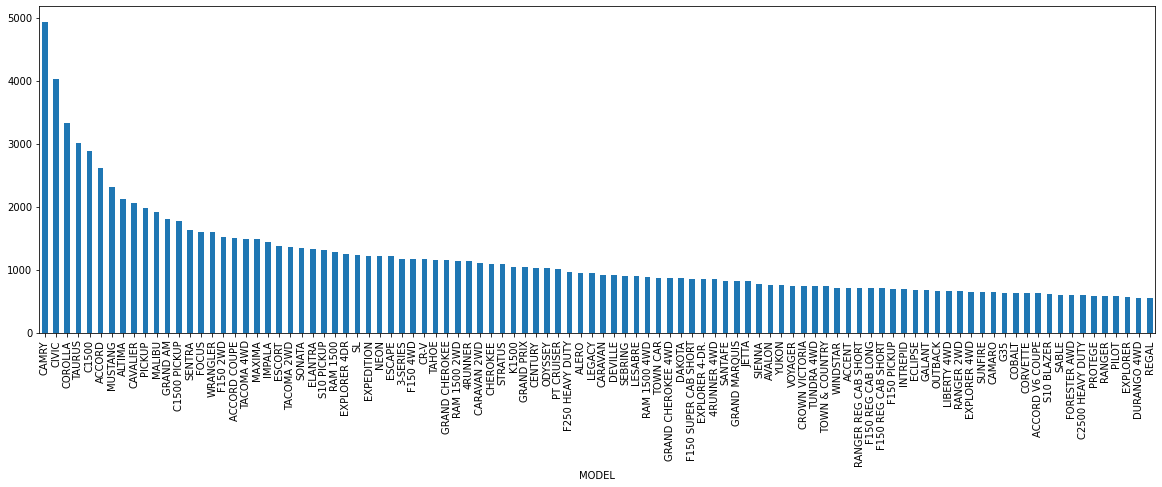

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby('MODEL').size().sort_values(ascending=False).head(100).plot.bar()

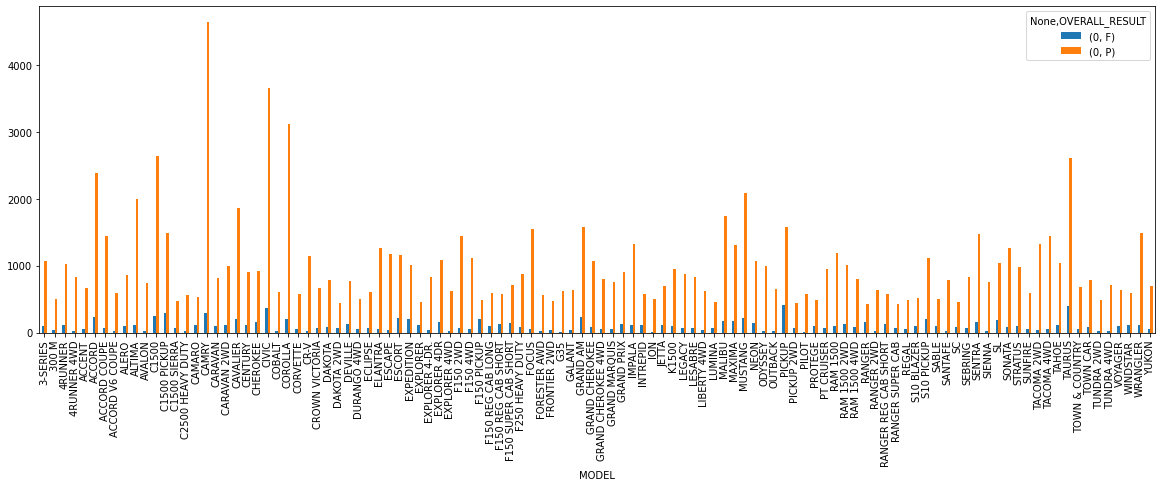

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
pd.DataFrame(frequent_models.groupby(['MODEL', 'OVERALL_RESULT']).size()).unstack().plot.bar(ax=ax)
#pd.DataFrame(df.groupby(['MODEL', 'OVERALL_RESULT']).size().sort_values(ascending=False).head(100)

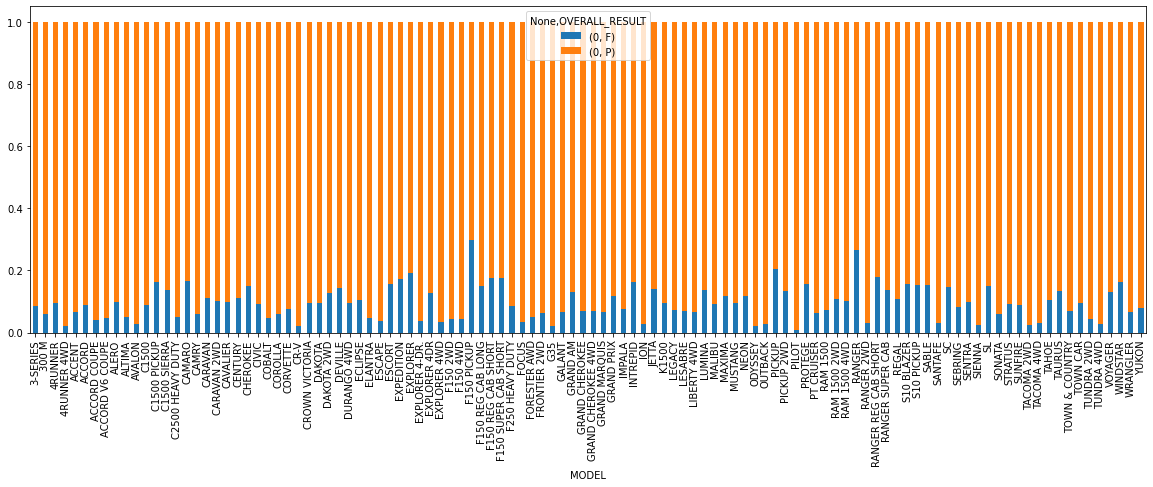

In [ ]:
# some of the cars DO seem to have a higher FAIL ratio (--> F150 Pickup, Ranger), but there are other Pickups that don't
fig, ax = plt.subplots(figsize=(20,6))
pd.DataFrame(frequent_models.groupby(['MODEL', 'OVERALL_RESULT']).size()/frequent_models.groupby('MODEL').size()).unstack().plot.bar(ax=ax, stacked=True)

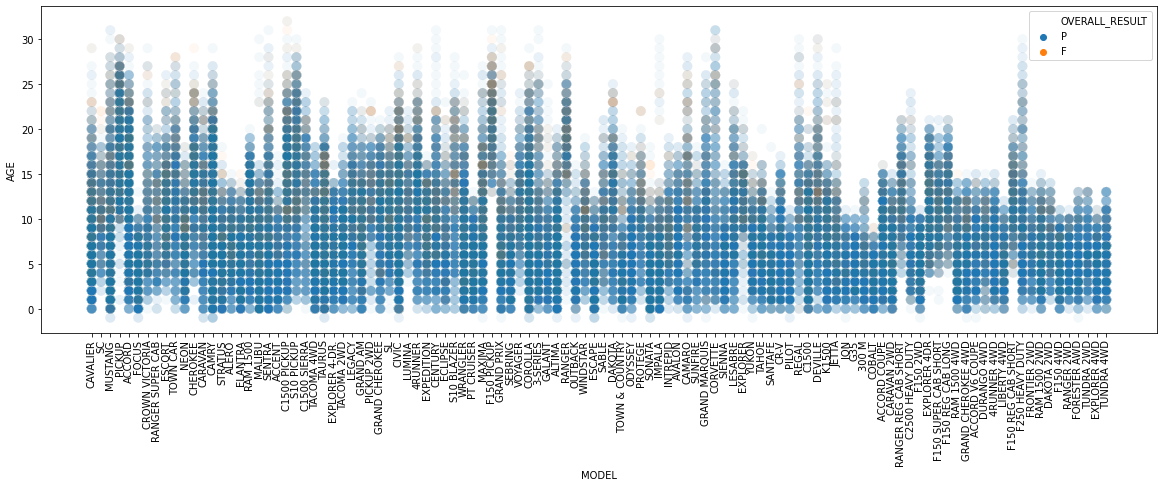

In [ ]:
#as expected, older cars seem to fail more often. There is no obvious relation between MODEL and RESULT.
fig, ax = plt.subplots(figsize=(20,6))
plt.xticks(rotation=90)
sns.scatterplot(data=frequent_models, x='MODEL', y='AGE', hue='OVERALL_RESULT', s=100, alpha=.05)

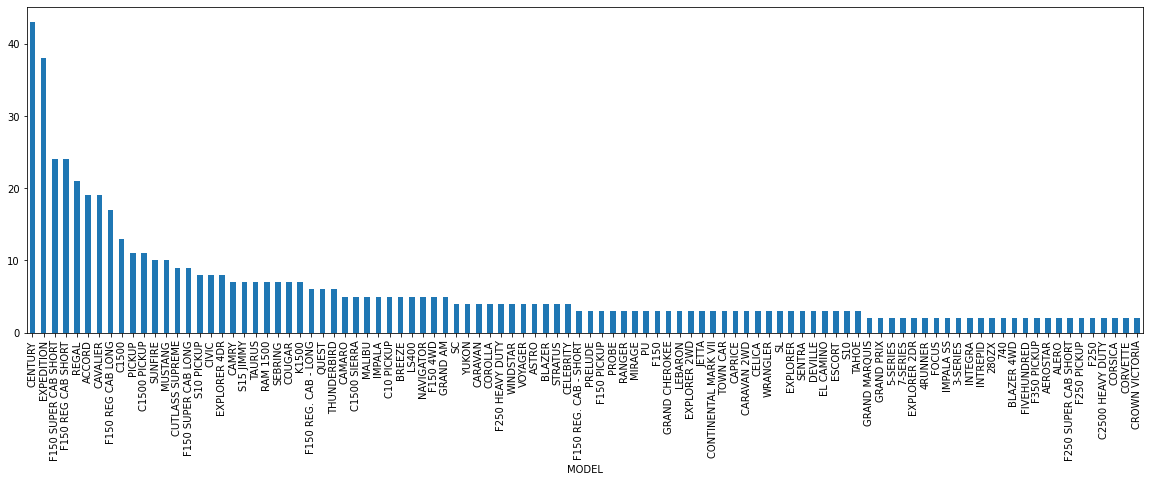

In [ ]:
#some of the models have more wrong odometer values (but here, a ration would be more informative than absolute values..)
fig, ax = plt.subplots(figsize=(20,6))
df[(df.ODOMETER == 88888888) | (df.ODOMETER == 100000)| (df.ODOMETER == 8888888)| (df.ODOMETER == 88888) | (df.ODOMETER == 0)].groupby('MODEL').size().sort_values(ascending=False).head(100).plot.bar()

# model - emission correlation


1.   model - emission --> categorical vs continuous --> logistic regression
2.   model - overall result --> categorical vs. binary --> cramers V


### prepare dataset

In [ ]:
#keep_model = ['MODEL','OVERALL_RESULT','E_HIGH_CO','E_HIGH_HC','E_HIGH_O2','E_HIGH_CO2','E_HIGH_CO_2','E_HIGH_HC_2','E_HIGH_O2_2','E_HIGH_CO2_2']
keep_model = ['MODEL','OVERALL_RESULT']
model_df = df[keep_model]


In [ ]:
model_df = model_df.dropna(subset=['MODEL','OVERALL_RESULT'])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(model_df['MODEL'])
model_df['ML'] = le.transform(model_df['MODEL'])
le_model_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_model_mapping)

{'.RIO': 0, '0UTBACK': 1, '1': 2, '100': 3, '100 QUATTRO': 4, '1000': 5, '128': 6, '128I': 7, '130': 8, '135I': 9, '1500': 10, '1500SAVANA': 11, '1500SIERRA': 12, '1500SUBURBAN': 13, '1500VAN': 14, '150RAMCHARGER': 15, '150SUPERCREW': 16, '164': 17, '164L': 18, '190': 19, '190D': 20, '190E': 21, '190E 2.3-16': 22, '190E 2.6': 23, '1S250': 24, '1S300': 25, '1SERIES': 26, '2': 27, '2.2CL': 28, '2.3CL': 29, '2.5TL': 30, '200': 31, '2000': 32, '200SX': 33, '20T': 34, '22CL': 35, '23CL': 36, '240': 37, '240 TURBO': 38, '240DL': 39, '240GL': 40, '240SX': 41, '240TURBO': 42, '242TI': 43, '244TURBO': 44, '245': 45, '2500': 46, '2500 VAN': 47, '2500EXPRESS': 48, '2500EXPRESSVAN': 49, '2500HD': 50, '2500PICKUP': 51, '2500RAMVAN': 52, '2500SHC': 53, '2500SPTVN': 54, '2500SUBURBAN': 55, '2500VANDURA': 56, '250H': 57, '25I': 58, '25L': 59, '260E': 60, '280C': 61, '280SL': 62, '280Z': 63, '280ZX': 64, '28X': 65, '2CL': 66, '2DOOR': 67, '2DR': 68, '2DR CAR': 69, '2DRCAR': 70, '3': 71, '3-SERIES': 72,

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(model_df['OVERALL_RESULT'])
model_df['OR'] = le.transform(model_df['OVERALL_RESULT'])
le_result_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_result_mapping)

{'A': 0, 'F': 1, 'I': 2, 'O': 3, 'P': 4}


In [ ]:
model_df.head()

,MODEL,OVERALL_RESULT
0,RANGER REG. CAB - SHO,P
1,CAVALIER,P
2,FESTIVA,A
3,GRAND WAGONEER,P
4,SC,P


In [ ]:
model_df=model_df.drop(["MODEL","OVERALL_RESULT"], axis=1)

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [ ]:
rows= []

for var1 in model_df:
  col = []
  for var2 in model_df:
    cramers =cramers_V(model_df[var1], model_df[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = model_df.columns, index =model_df.columns)

NameError: ignored

In [ ]:
df

,MODEL,OVERALL_RESULT
MODEL,1.00,0.03
OVERALL_RESULT,0.03,1.00


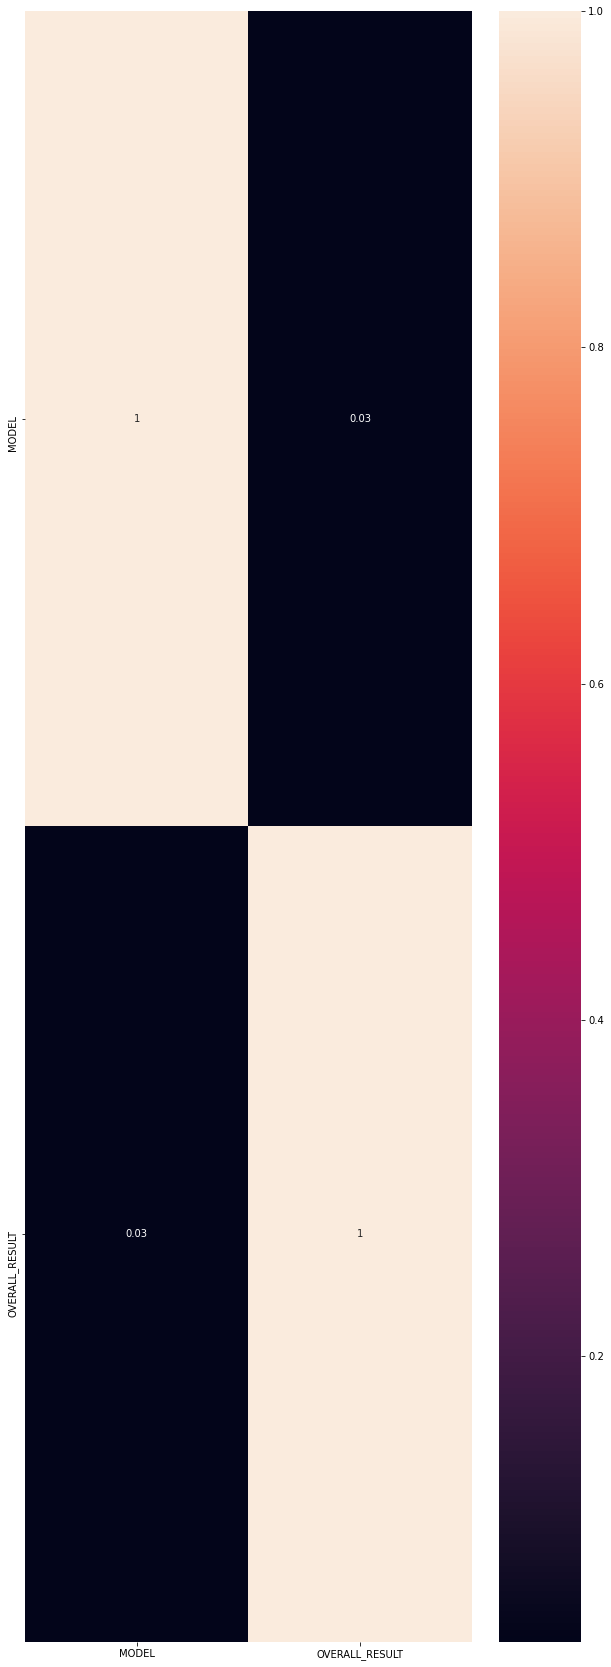

In [ ]:
plt.figure(figsize = (10,30))
sns.heatmap(df, annot=True)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

###label encoder for model

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(model_df['MODEL'])
model_df['ML'] = le.transform(model_df['MODEL'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'.RIO': 0, '0UTBACK': 1, '1': 2, '100': 3, '100 QUATTRO': 4, '1000': 5, '128': 6, '128I': 7, '130': 8, '135I': 9, '1500': 10, '1500SAVANA': 11, '1500SIERRA': 12, '1500SUBURBAN': 13, '1500VAN': 14, '150RAMCHARGER': 15, '150SUPERCREW': 16, '164': 17, '164L': 18, '190': 19, '190D': 20, '190E': 21, '190E 2.3-16': 22, '190E 2.6': 23, '1S250': 24, '1S300': 25, '1SERIES': 26, '2': 27, '2.2CL': 28, '2.3CL': 29, '2.5TL': 30, '200': 31, '2000': 32, '200SX': 33, '20T': 34, '22CL': 35, '23CL': 36, '240': 37, '240 TURBO': 38, '240DL': 39, '240GL': 40, '240SX': 41, '240TURBO': 42, '242TI': 43, '244TURBO': 44, '245': 45, '2500': 46, '2500 VAN': 47, '2500EXPRESS': 48, '2500EXPRESSVAN': 49, '2500HD': 50, '2500PICKUP': 51, '2500RAMVAN': 52, '2500SHC': 53, '2500SPTVN': 54, '2500SUBURBAN': 55, '2500VANDURA': 56, '250H': 57, '25I': 58, '25L': 59, '260E': 60, '280C': 61, '280SL': 62, '280Z': 63, '280ZX': 64, '28X': 65, '2CL': 66, '2DOOR': 67, '2DR': 68, '2DR CAR': 69, '2DRCAR': 70, '3': 71, '3-SERIES': 72,

In [ ]:
model_df.ML

0         1971
1          575
2         1064
3         1285
4         2144
          ... 
235171     695
235172     971
235173    1146
235174    2665
235175    2410
Name: ML, Length: 233379, dtype: int64

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#gle = LabelEncoder()
#model_labels = gle.fit_transform(model_df['MODEL'])
#model_mappings = {index: label for index, label in 
 #                 enumerate(gle.classes_)}
#model_mappings


{0: '.RIO',
 1: '0UTBACK',
 2: '1',
 3: '100',
 4: '100 QUATTRO',
 5: '1000',
 6: '128',
 7: '128I',
 8: '130',
 9: '135I',
 10: '1500',
 11: '1500SAVANA',
 12: '1500SIERRA',
 13: '1500SUBURBAN',
 14: '1500VAN',
 15: '150RAMCHARGER',
 16: '150SUPERCREW',
 17: '164',
 18: '164L',
 19: '190',
 20: '190E',
 21: '190E 2.3-16',
 22: '190E 2.6',
 23: '1S250',
 24: '1S300',
 25: '1SERIES',
 26: '2',
 27: '2.2CL',
 28: '2.3CL',
 29: '2.5TL',
 30: '200',
 31: '2000',
 32: '200SX',
 33: '20T',
 34: '22CL',
 35: '23CL',
 36: '240',
 37: '240 TURBO',
 38: '240DL',
 39: '240GL',
 40: '240SX',
 41: '240TURBO',
 42: '242TI',
 43: '244TURBO',
 44: '2500',
 45: '2500 VAN',
 46: '2500EXPRESS',
 47: '2500EXPRESSVAN',
 48: '2500HD',
 49: '2500PICKUP',
 50: '2500RAMVAN',
 51: '2500SHC',
 52: '2500SPTVN',
 53: '2500SUBURBAN',
 54: '2500VANDURA',
 55: '250H',
 56: '25I',
 57: '25L',
 58: '260E',
 59: '280SL',
 60: '280Z',
 61: '280ZX',
 62: '28X',
 63: '2CL',
 64: '2DOOR',
 65: '2DR',
 66: '2DR CAR',
 67: '2

#logistic regression

In [ ]:
model_df

,MODEL,E_HIGH_CO,ML
0,RANGER REG. CAB - SHO,0.00,1971
1,CAVALIER,0.00,575
2,FESTIVA,0.00,1064
3,GRAND WAGONEER,0.00,1285
4,SC,0.00,2144
...,...,...,...
235171,COROLLA,0.00,695
235172,EXPLORER 4DR,0.00,971
235173,FRONTIER 2WD,0.00,1146
235174,X6,0.00,2665


In [ ]:
df_target = model_df["ML"]

In [ ]:
df_target

0         1971
1          575
2         1064
3         1285
4         2144
          ... 
235171     695
235172     971
235173    1146
235174    2665
235175    2410
Name: ML, Length: 233379, dtype: int64

In [ ]:
df_features=model_df.drop(["MODEL","ML"], axis=1)

In [ ]:
df_features

,E_HIGH_CO
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
235171,0.00
235172,0.00
235173,0.00
235174,0.00


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(df_features)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(X_std, df_target, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg_model = LogisticRegression(random_state=0, multi_class='auto')

In [ ]:
log_reg_model.fit(features_train, target_train)

In [ ]:
prediction = log_reg_model.predict(features_test)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(target_test, prediction)

ValueError: ignored

#CYLINDER
has a strange value "R" - but it is not frequent (N=90) and can eventually be removed (?)
tranforming to float makes the variable more consistent

In [ ]:
df.CYL.describe()




count     210675
unique        18
top            6
freq       69576
Name: CYL, dtype: object

In [ ]:
df.CYL.value_counts()

6       69576
4       57091
8       37199
6.0     18525
4.0     15690
8.0     10089
5        1036
10        592
5.0       355
3         198
10.0      135
R          73
3.0        45
12         28
7          26
12.0       11
9           4
7.0         2
Name: CYL, dtype: int64

In [ ]:
df = df[df.CYL != 'R']

In [ ]:
df["CYL"] = df.CYL.astype(float)
df.CYL.describe()

count    210602.000000
mean          5.762946
std           1.517728
min           3.000000
25%           4.000000
50%           6.000000
75%           6.000000
max          12.000000
Name: CYL, dtype: float64

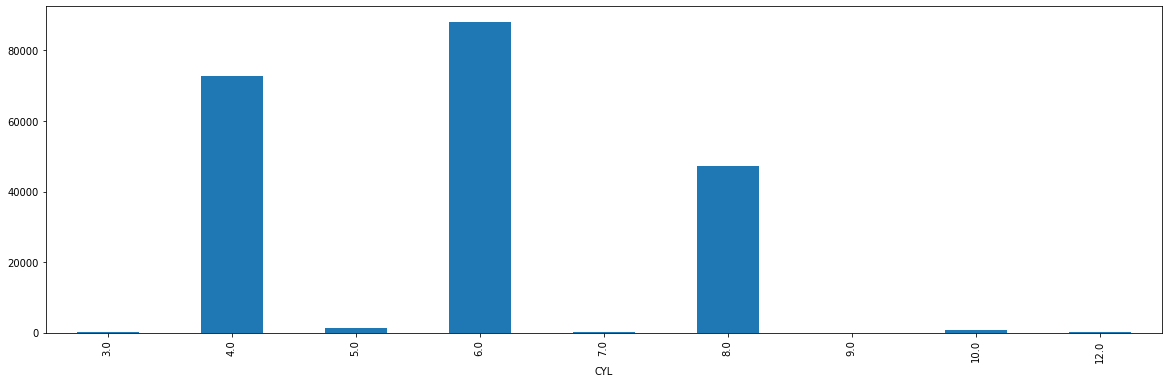

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby('CYL').size().plot.bar()

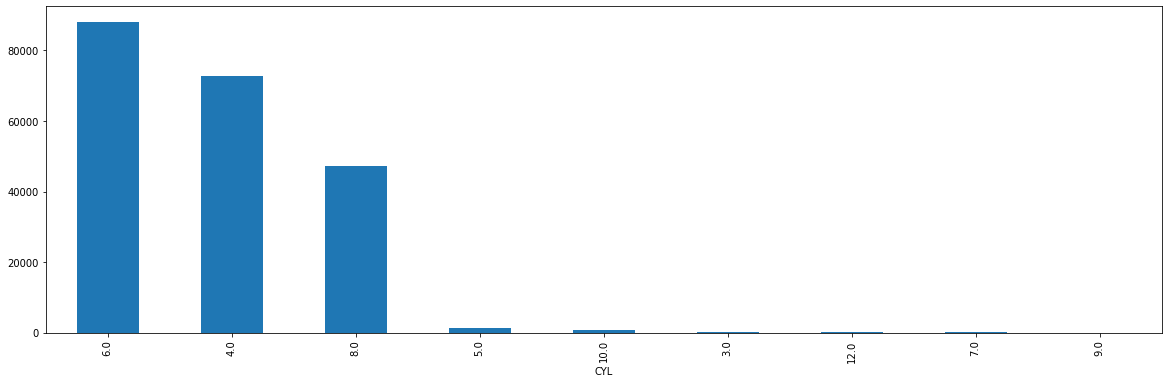

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby('CYL').size().sort_values(ascending=False).head(100).plot.bar()

In [ ]:
keep_model = ['CYL','E_HIGH_CO','E_HIGH_HC','E_HIGH_O2','E_HIGH_CO2','E_HIGH_CO_2','E_HIGH_HC_2','E_HIGH_O2_2','E_HIGH_CO2_2']
cyl_df = df[keep_model]

In [ ]:
corr_matrix = cyl_df.corr()

In [ ]:
corr_matrix['CYL'].sort_values(ascending=False)

CYL             1.000000
E_HIGH_O2       0.048575
E_HIGH_O2_2     0.003408
E_HIGH_HC      -0.006318
E_HIGH_CO      -0.007324
E_HIGH_CO2     -0.009130
E_HIGH_HC_2    -0.009372
E_HIGH_CO_2    -0.016407
E_HIGH_CO2_2   -0.019816
Name: CYL, dtype: float64

In [ ]:
attributes = ['CYL','E_HIGH_CO','E_HIGH_HC','E_HIGH_O2','E_HIGH_CO2']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d52271ef0>,
      dtype=object)

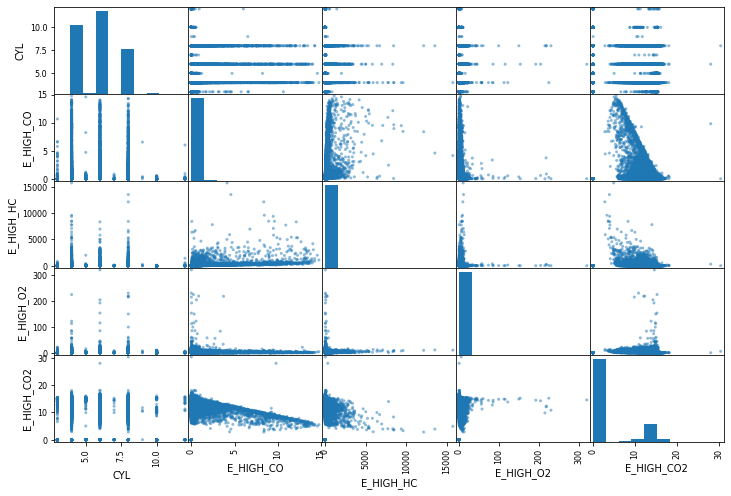

In [ ]:
scatter_matrix(cyl_df[attributes],figsize=(12,8))

In [ ]:
keep_model = ['E_IDLE_HC_RESULT','OVERALL_RESULT']#'E_IDLE_CO_RESULT',
idle_df = df[keep_model]

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

In [ ]:
rows= []

for var1 in idle_df:
  col = []
  for var2 in idle_df:
    cramers =cramers_V(idle_df[var1], idle_df[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = idle_df.columns, index =idle_df.columns)

In [ ]:
df

,E_IDLE_HC_RESULT,OVERALL_RESULT
E_IDLE_HC_RESULT,1.00,0.21
OVERALL_RESULT,0.21,1.00


In [ ]:
keep_model = ['E_IDLE_CO_RESULT','OVERALL_RESULT']#'E_IDLE_CO_RESULT',
co_df = df[keep_model]

In [ ]:
rows= []

for var1 in co_df:
  col = []
  for var2 in co_df:
    cramers =cramers_V(co_df[var1], co_df[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
co_result = pd.DataFrame(cramers_results, columns = co_df.columns, index =co_df.columns)

In [ ]:
co_result

,E_IDLE_CO_RESULT,OVERALL_RESULT
E_IDLE_CO_RESULT,1.00,0.11
OVERALL_RESULT,0.11,1.00
